In [1]:
# Utilizaremos un set de datos de las policias de New York del año 2009 y 2010. (2009_1perc.csv y 2010_1perc.csv) los cuales nos darán información
# de los procedimientos policiales realizados. Además se le entregará el diccionario de variables para que pueda consultar que significa cada
# categoría dentro de las variables.
# ● La variable respuesta 'arstmade' informa si los procedimientos policiales han terminado en arresto o no, y el objetivo será realizar un modelo de
# Machine Learning para predecir si un futuro procedimiento terminará en arresto.

# 1.- Enliste todas las librerias que utilizará
# Nota: Se recomienda ir actualizando la lista conforme las necesidades vaya
# teniendo durante el desarrollo de la prueba

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 2.- Importación y revisión de los datos
# Importe ambos sets. Dado que la fuente de datos proviene de la misma base,
# tienen las mismas columnas. Consolide ambos sets y reporte una
# exploración básica de los datos (numero de filas/columnas, tipos de datos,
# estadísticas básicas, casos perdidos)

# Cargar los datos
df_2009 = pd.read_excel('C:/Users/bebit/Desktop/tareas/csv/2009_1perc.xlsx')
df_2010 = pd.read_excel('C:/Users/bebit/Desktop/tareas/csv/2010_1perc.xlsx')
# Unir los datos de 2009 y 2010
df = pd.concat([df_2009, df_2010])

print(df.head())

   Unnamed: 0  year  pct  ser_num  datestop  timestop recstat inout trhsloc   
0      178048  2009   41     1779   4032009       130       A     O       P  \
1      498873  2009  108     5805  10292009      1050       A     O       P   
2      463573  2009   43     8340  10062009      1450       1     O       P   
3       43626  2009   77      932   1232009      1843       A     O       P   
4      563921  2009  110    11224  12132009      1655       A     O       P   

   perobs  ... zip  addrpct sector beat post   xcoord  ycoord dettypcm linecm   
0     1.0  ...           41      G    7       1013067  238633       CM      1  \
1     3.0  ...          108      J            1012043  212157       CM      1   
2     1.0  ...           43      E            1017599  240200       CM      1   
3     5.0  ...           77      J    4   35  1002625  183442       CM      1   
4     3.0  ...          110      H            1024535  209890       CM      1   

   detailcm  
0        20  
1        1

In [4]:
# Exploración básica de los datos
print("Número de filas y columnas:", df.shape)
print("\nTipos de datos:\n", df.dtypes)
print("\nEstadísticas básicas:\n", df.describe())
print("\nCasos perdidos:\n", df.isnull().sum())

Número de filas y columnas: (11825, 112)

Tipos de datos:
 Unnamed: 0     int64
year           int64
pct            int64
ser_num        int64
datestop       int64
               ...  
xcoord        object
ycoord        object
dettypcm      object
linecm        object
detailcm      object
Length: 112, dtype: object

Estadísticas básicas:
           Unnamed: 0          year           pct       ser_num      datestop   
count   11825.000000  11825.000000  11825.000000  11825.000000  1.182500e+04  \
mean   295983.814799   2009.508499     68.625624   5697.994334  6.364221e+06   
std    170820.705702      0.499949     33.037826   5152.486022  3.429091e+06   
min        52.000000   2009.000000      1.000000      1.000000  1.012009e+06   
25%    147515.000000   2009.000000     42.000000   2002.000000  3.232009e+06   
50%    296652.000000   2010.000000     73.000000   4366.000000  6.162010e+06   
75%    443097.000000   2010.000000    102.000000   7840.000000  9.232009e+06   
max    601281.00000

In [5]:
# 3.- Preprocesamiento de datos
# Habrá notado que los datos parecen tener ciertas inconsistencias. Siga los
# siguientes pasos para limpiar este set:

#● 3.1 Obtenga una lista con todas las variables categoricas que tengan entre 2 y 99 categorías (inclusive). (hint: son las variables tipo categoricas
categorical_vars = []
for column in df.columns:
    if df[column].dtype == 'object' and df[column].nunique() >= 2 and df[column].nunique() <= 99:
        categorical_vars.append(column)

# 3.2 Reemplazar clases faltantes en columnas específicas
df.loc[df['officrid'] == '', 'officrid'] = 'N'
df.loc[df['offshld'] == '', 'offshld'] = 'N'
df.loc[df['offverb'] == '', 'offverb'] = 'N'

df.loc[df['sector'] == '', 'sector'] = 'U'
df.loc[df['trhsloc'] == '', 'trhsloc'] = 'U'
df.loc[df['beat'] == '', 'beat'] = 'U'

# 3.3 Transformar las columnas ht_feet y ht_inch en una única columna 'meters'
df['meters'] = (df['ht_feet'] + df['ht_inch']) * 0.3048

# 3.4 Crear columnas 'month' y 'year' a partir de la columna 'datestop'
df['month'] = df['datestop'].apply(lambda x: str(x)[0:2])
df['year'] = df['datestop'].apply(lambda x: str(x)[-4:])

# Mostrar los cambios realizados
print("Variables categóricas:")
print(categorical_vars)
print("\nColumnas actualizadas:")
print(df.head())

Variables categóricas:
['recstat', 'inout', 'trhsloc', 'typeofid', 'explnstp', 'othpers', 'arstmade', 'sumissue', 'offunif', 'officrid', 'frisked', 'searched', 'contrabn', 'pistol', 'riflshot', 'asltweap', 'knifcuti', 'othrweap', 'pf_hands', 'pf_wall', 'pf_grnd', 'pf_drwep', 'pf_ptwep', 'pf_baton', 'pf_hcuff', 'pf_pepsp', 'pf_other', 'radio', 'ac_rept', 'ac_inves', 'rf_vcrim', 'rf_othsw', 'ac_proxm', 'rf_attir', 'cs_objcs', 'cs_descr', 'cs_casng', 'cs_lkout', 'rf_vcact', 'cs_cloth', 'cs_drgtr', 'ac_evasv', 'ac_assoc', 'cs_furtv', 'rf_rfcmp', 'ac_cgdir', 'rf_verbl', 'cs_vcrim', 'cs_bulge', 'cs_other', 'ac_incid', 'ac_time', 'rf_knowl', 'ac_stsnd', 'ac_other', 'sb_hdobj', 'sb_outln', 'sb_admis', 'sb_other', 'rf_furt', 'rf_bulg', 'offverb', 'offshld', 'sex', 'race', 'haircolr', 'eyecolor', 'build', 'addrtyp', 'city', 'addrpct', 'sector', 'beat', 'post', 'dettypcm', 'linecm', 'detailcm']

Columnas actualizadas:
   Unnamed: 0  year  pct  ser_num  datestop  timestop recstat inout trhsloc   


In [6]:
# 3.5 Filtrar el DataFrame y dejar solo las columnas seleccionadas en el punto 3.1, el mes, el año, los metros y la edad
selected_columns = categorical_vars + ['month', 'year', 'meters', 'age']
filtered_df = df[selected_columns]

# Filtrar los registros cuyas edades estén entre 18 y 100 años, ambos inclusive
filtered_df = filtered_df[(filtered_df['age'] >= 18) & (filtered_df['age'] <= 100)]

# Mostrar el DataFrame filtrado
print(filtered_df.head())


  recstat inout trhsloc typeofid explnstp othpers arstmade sumissue offunif   
0       A     O       P        P        Y       N        N        N       Y  \
2       1     O       P        V        Y       N        N        N       N   
3       A     O       P        P        Y       N        N        N       Y   
4       A     O       P        P        Y       Y        N        N       Y   
5       1     I       T        V        Y       N        N        N       N   

  officrid  ... sector beat post dettypcm linecm detailcm month  year  meters   
0           ...      G    7            CM      1       20    40  2009  4.2672  \
2           ...      E                 CM      1       20    10  2009  2.7432   
3           ...      J    4   35       CM      1       24    12  2009  3.0480   
4           ...      H                 CM      1       20    12  2009  3.3528   
5        I  ...      F   16            CM      1       26    52  2009  3.9624   

    age  
0  24.0  
2  21.0  
3  22.0 

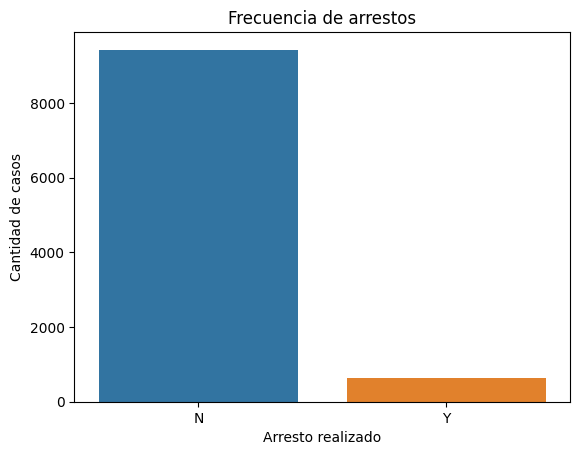

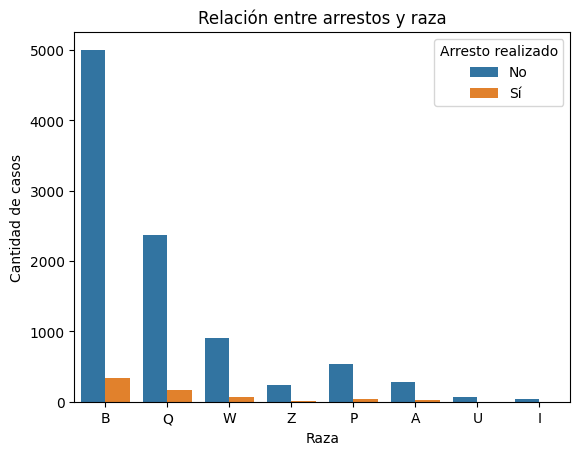

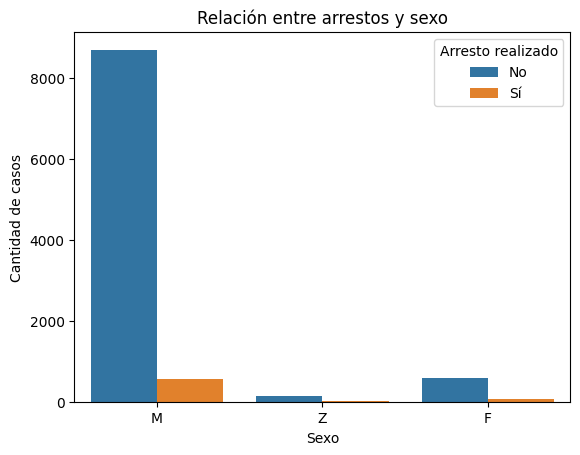

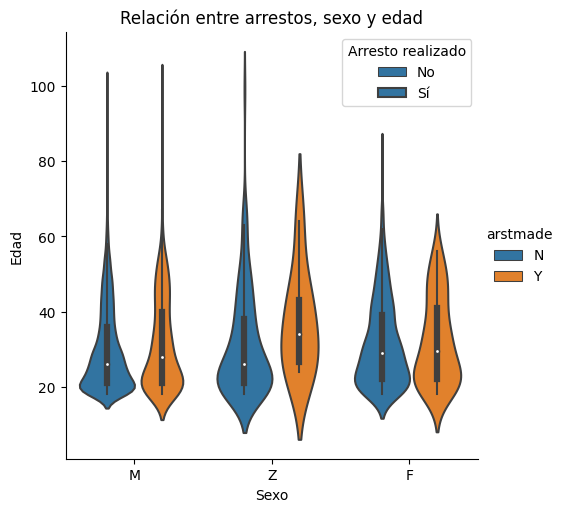

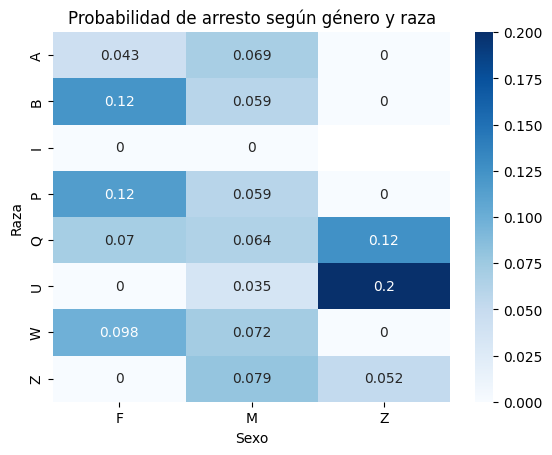

In [7]:
#4.- Análisis exploratorio


# 4.1 Estudiar la variable respuesta por sí sola (arstmade)
sns.countplot(x='arstmade', data=filtered_df)
plt.title('Frecuencia de arrestos')
plt.xlabel('Arresto realizado')
plt.ylabel('Cantidad de casos')
plt.show()

# 4.2 Estudiar la relación de la variable respuesta en comportamiento con la raza
sns.countplot(x='race', hue='arstmade', data=filtered_df)
plt.title('Relación entre arrestos y raza')
plt.xlabel('Raza')
plt.ylabel('Cantidad de casos')
plt.legend(title='Arresto realizado', labels=['No', 'Sí'])
plt.show()

# 4.3 Estudiar la relación de la variable respuesta en comportamiento con el sexo
sns.countplot(x='sex', hue='arstmade', data=filtered_df)
plt.title('Relación entre arrestos y sexo')
plt.xlabel('Sexo')
plt.ylabel('Cantidad de casos')
plt.legend(title='Arresto realizado', labels=['No', 'Sí'])
plt.show()

# 4.4 Estudiar la relación de la variable respuesta en comportamiento con el sexo y la edad en conjunto
sns.catplot(x='sex', y='age', hue='arstmade', data=filtered_df, kind='violin')
plt.title('Relación entre arrestos, sexo y edad')
plt.xlabel('Sexo')
plt.ylabel('Edad')
plt.legend(title='Arresto realizado', labels=['No', 'Sí'])
plt.show()

# 4.5 Recodificar la variable respuesta a 1 y 0
filtered_df['arstmade_recoded'] = filtered_df['arstmade'].map({'N': 0, 'Y': 1})

# 4.6 Mostrar la probabilidad condicional de arresto según género y raza
arrest_prob = filtered_df.groupby(['race', 'sex'])['arstmade_recoded'].mean().unstack()
sns.heatmap(data=arrest_prob, annot=True, cmap='Blues')
plt.title('Probabilidad de arresto según género y raza')
plt.xlabel('Sexo')
plt.ylabel('Raza')
plt.show()

In [8]:
#5.-Determinar si el procedimiento policial concluirá en alguna acción violenta.

# Generar la variable 'violencia'
pf_columns = ['pf_hands', 'pf_wall', 'pf_grnd', 'pf_drwep', 'pf_ptwep', 'pf_baton', 'pf_hcuff', 'pf_pepsp', 'pf_other']
filtered_df['violencia'] = filtered_df[pf_columns].apply(lambda row: 1 if 'Y' in row.values else 0, axis=1)

# Calcular el porcentaje de casos con violencia
porcentaje_violencia = (filtered_df['violencia'].sum() / len(filtered_df)) * 100

print("Porcentaje de casos con violencia: {:.2f}%".format(porcentaje_violencia))


Porcentaje de casos con violencia: 24.19%


In [9]:
print(filtered_df.head())


  recstat inout trhsloc typeofid explnstp othpers arstmade sumissue offunif   
0       A     O       P        P        Y       N        N        N       Y  \
2       1     O       P        V        Y       N        N        N       N   
3       A     O       P        P        Y       N        N        N       Y   
4       A     O       P        P        Y       Y        N        N       Y   
5       1     I       T        V        Y       N        N        N       N   

  officrid  ... post dettypcm linecm detailcm month  year  meters   age   
0           ...            CM      1       20    40  2009  4.2672  24.0  \
2           ...            CM      1       20    10  2009  2.7432  21.0   
3           ...   35       CM      1       24    12  2009  3.0480  22.0   
4           ...            CM      1       20    12  2009  3.3528  18.0   
5        I  ...            CM      1       26    52  2009  3.9624  47.0   

  arstmade_recoded violencia  
0                0         0  
2           

In [10]:
#6.-Modelacion

# 6.1 Genere las variables dummies correspondientes (Tenga cuidado de no utilizar variables que expliquen lo mismo, ¡recuerde que acaba de crear
# una variable a partir de otras!, además recuerde que creó una variable numérica que es una categoría :) ). Luego genere los sets de train-test
# utilizando el año 2009 para entrenar, y el año 2010 para testear.

# Generar variables dummies
df_dummies = pd.get_dummies(filtered_df.drop(['arstmade_recoded'], axis=1))

# Dividir los datos en conjuntos de entrenamiento y prueba
train_data = df_dummies[df_dummies['year_2009'] == 1]   # 4981 registros
test_data = df_dummies[df_dummies['year_2010'] == 1]    # 5091 registros

# Obtener las variables de entrada y la variable objetivo para entrenamiento y prueba
X_train = train_data.drop(['arstmade_Y','arstmade_N'], axis=1)  # 646 re
y_train = train_data['arstmade_Y']   # 646 registros terminaron en arreato, artstmade_N contiene los que no fueron arrestado 
X_test = test_data.drop(['arstmade_Y','arstmade_N'], axis=1)
y_test = test_data['arstmade_Y']  # 646 registros terminaron en arreato, artstmade_N contiene los que no fueron arrestado 


# 6.2 Entrene 2 modelos de clasificación y reporte el mejor modelo bajo algún criterio.
# Entrenar modelo de Regresión Logística
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Entrenar modelo de Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
logreg_pred = logreg_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

# Evaluar los modelos
logreg_accuracy = accuracy_score(y_test, logreg_pred)
logreg_precision = precision_score(y_test, logreg_pred)
logreg_recall = recall_score(y_test, logreg_pred)
logreg_f1 = f1_score(y_test, logreg_pred)

rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)

# Comparar los modelos
if logreg_f1 > rf_f1:
    best_model = "Regresión Logística"
    best_accuracy = logreg_accuracy
    best_precision = logreg_precision
    best_recall = logreg_recall
    best_f1 = logreg_f1
else:
    best_model = "Random Forest"
    best_accuracy = rf_accuracy
    best_precision = rf_precision
    best_recall = rf_recall
    best_f1 = rf_f1

# Reportar el mejor modelo
print("Mejor modelo: ", best_model)
print("Exactitud: ", best_accuracy)
print("Precisión: ", best_precision)
print("Recall: ", best_recall)
print("F1-Score: ", best_f1)



C:\Users\bebit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Mejor modelo:  Regresión Logística
Exactitud:  0.9667911180978581
Precisión:  0.8583333333333333
Recall:  0.6041055718475073
F1-Score:  0.7091222030981068
